In [60]:
import mesa_reader as mr
import numpy as np


import sys
sys.path.append('/nfs/turbo/bsafdi/dessert/code/misc')
import mesa_manager as mm
import webplotdigitizer as wpd

from matplotlib import colors
from matplotlib import rc
from matplotlib import rcParams
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25})
rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
from matplotlib.animation import FuncAnimation

keV2erg = 1.60218e-9
GeV2keV = 1e6
Rsol2cm = 6.957e10
K2keV = 0.086/1e6
m_u = .931*GeV2keV
g2GeV = 5.61e23
cm2GeVinv = 1/1.98e-14
GeV2sinv = 1.52e24
alpha_EM = 1./137
pc2cm = 3.086e+18
keV2difflum = keV2erg*GeV2sinv/GeV2keV # converts keV to erg/s/keV
g2Msol = 5.03e-34
k_in_erg_K = 1.381e-16 # Boltzmann's constant in erg/K

### Here we find parameters to input to the inlist:

#### inject_extra_ergs_sec

added to mass equal to grams_for_inject_extra_core_ergs_sec can be used simultaneously with extra_power_source and inject_uniform_extra_heat

inject_extra_ergs_sec = 0

#### base_of_inject_extra_ergs_sec

(units: Msun) sets bottom of region for inject_extra_ergs_sec note: actual base is at max of this and the center of the model

base_of_inject_extra_ergs_sec = 0

#### total_mass_for_inject_extra_ergs_sec

(units: Msun) sets size of region for inject_extra_ergs_sec

total_mass_for_inject_extra_ergs_sec = 0

#### start_time_for_inject_extra_ergs_sec

(units: sec) start time for injecting extra ergs/s

start_time_for_inject_extra_ergs_sec = -1d99

#### duration_for_inject_extra_ergs_sec

(units: sec) length of time for injecting extra ergs/s set to negative value to keep injecting indefinitely or until reach target

duration_for_inject_extra_ergs_sec = -1

In [88]:
print rgnum

11


In [3]:
# Do for mass 1.3 solar for now
mass = 1.3
rgnum = str(int(10*mass-2))

base = '/scratch/bsafdi_root/bsafdi/dessert/MESA_models/RG/RG'+rgnum+'_v4/'
logs = base + 'LOGS'
history = logs + '/history.data'

l = mr.MesaLogDir(logs)
h = mr.MesaData(history)

model_num = h.model_number

In [4]:
logT_eff_arr = []
logL_arr = []
T_arr = []
R_arr = []
M_arr = []
dR_arr = []
rho_arr = []
X_arr = []
Y_arr = []
ZC_arr = []
ZO_arr = []
eta_arr = []
age_arr = []
mass_arr = []

for mn in model_num:
    try:
        p = l.profile_data(model_number=mn)
    except:
        continue

#     logT_eff_arr += [np.log10(p.Teff)]
#     logL_arr += [np.log10(p.photosphere_L)]
    T_arr += [10 ** p.logT]
    R_arr += [10 ** p.logR]
    M_arr += [p.mass]
    dR_arr += [p.dr/Rsol2cm]
    rho_arr += [10 ** p.logRho]
#     X_arr += [10 ** p.log_h1]
#     Y_arr += [10 ** p.log_he4]
#     ZC_arr += [10 ** p.log_c12]
#     ZO_arr += [10 ** p.log_o16]
    eta_arr += [p.eta]
    age_arr += [p.star_age]
    
# logT_eff_arr = np.array(logT_eff_arr)
# logL_arr = np.array(logL_arr)
age_arr = np.array(age_arr)


In [5]:
Tmax = np.array([Tprof.max() for Tprof in T_arr])
Targmax = np.array([Tprof.argmax() for Tprof in T_arr])
Tcore = np.array([Tprof[-1] for Tprof in T_arr])
dTcoredt = (Tcore[:-1]-Tcore[1:])/(age_arr[:-1]-age_arr[1:])
# Ycore = np.array([Yprof[-1] for Yprof in Y_arr])
# Yhot = np.array([Y_arr[i][Targmax[i]] for i in range(len(Y_arr))])
etacore = np.array([etaprof[-1] for etaprof in eta_arr])

In [6]:
idx_RG_start = np.where(etacore > 4)[0][0]
idx_RG_end = np.where(etacore > 4)[0][-1]
# idx_near_HF = np.where((Tmax > Tcore) & (Ycore > 0.5))[0][0]
idx_initial_HF_start = np.argmin(dTcoredt)
idx_initial_HF_max_temp = np.argmax(Tmax)
idx_HF_end = np.argmax(dTcoredt)+1
print age_arr[idx_RG_start]
# print age_arr[idx_near_HF]
print age_arr[idx_initial_HF_start]
print age_arr[idx_initial_HF_max_temp]
print age_arr[idx_HF_end]


4199947583.239709
4723250649.974713
4723250649.984267
4725070831.018152


/sw/lsa/centos7/python-anaconda2/2019.03/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


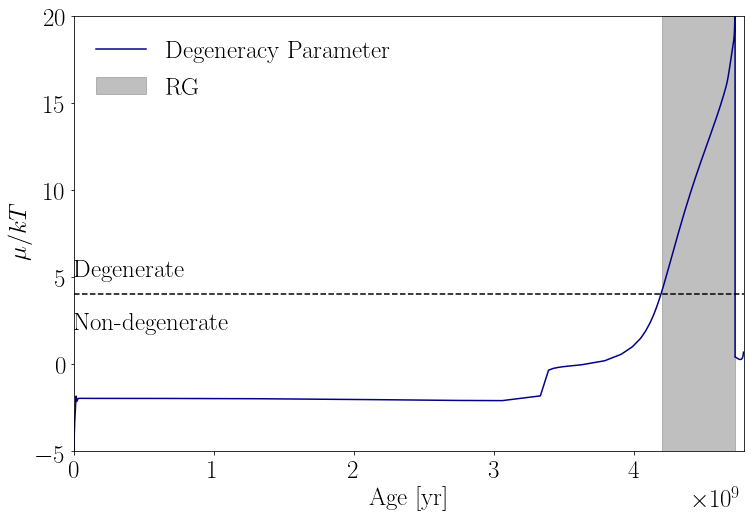

In [7]:
plt.figure(figsize=(12,8))
plt.plot(age_arr,etacore,label='Degeneracy Parameter',color='darkblue')
plt.axvspan(age_arr[idx_RG_start],age_arr[idx_RG_end],color='gray',alpha=0.5,label='RG')
plt.axhline(4,color='black',linestyle='--')
plt.text(0.1,5,'Degenerate')
plt.text(0.1,2,'Non-degenerate')
plt.xlabel('Age [yr]')
plt.xlim(0,age_arr[-1])
plt.ylim(-5,20)
plt.ylabel('$\mu/kT$')
plt.legend(loc='best',frameon=0)

# Arbitrarily decide to inject the energy at etacore == 10

Now take a closer look at this model

In [31]:
idx_inject_model = np.where(etacore > 10)[0][0]
start_time_for_inject_extra_ergs_sec = age_arr[idx_inject_model]*3.154e7 # s
print 'start_time_for_inject_extra_ergs_sec = ',start_time_for_inject_extra_ergs_sec,'s'
print 'start_time_for_inject_extra_ergs_sec = ',start_time_for_inject_extra_ergs_sec/3.154e7/1e9,'Gyr'

start_time_for_inject_extra_ergs_sec =  1.3948360404348214e+17 s
start_time_for_inject_extra_ergs_sec =  4.422435131372294 Gyr


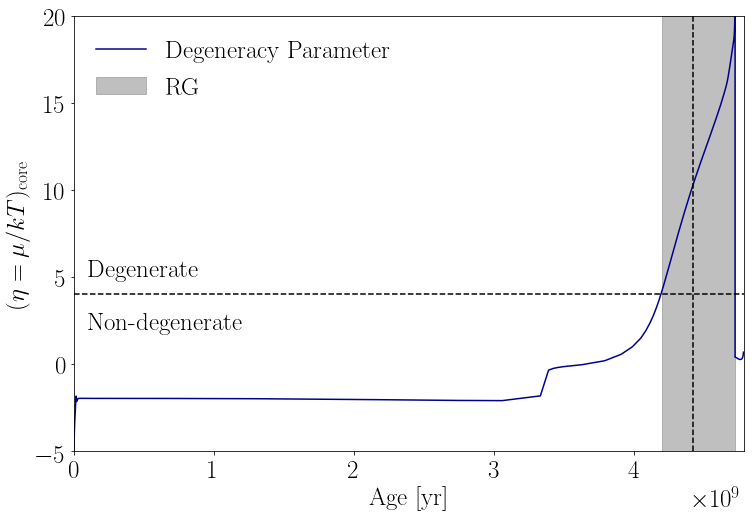

In [34]:
plt.figure(figsize=(12,8))
plt.plot(age_arr,etacore,label='Degeneracy Parameter',color='darkblue')
plt.axvspan(age_arr[idx_RG_start],age_arr[idx_RG_end],color='gray',alpha=0.5,label='RG')
plt.axhline(4,color='black',linestyle='--')
plt.axvline(age_arr[idx_inject_model],color='black',linestyle='--')
plt.text(0.1e9,5,'Degenerate')
plt.text(0.1e9,2,'Non-degenerate')
plt.xlabel('Age [yr]')
plt.xlim(0,age_arr[-1])
plt.ylim(-5,20)
plt.ylabel('$(\eta = \mu/kT)_{\\rm core}$')
plt.legend(loc='best',frameon=0)

Text(0,0.5,'$\\eta = \\epsilon/kT$')

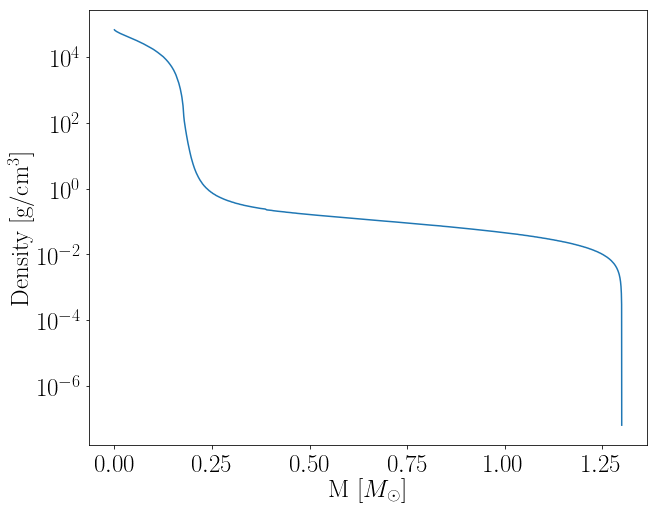

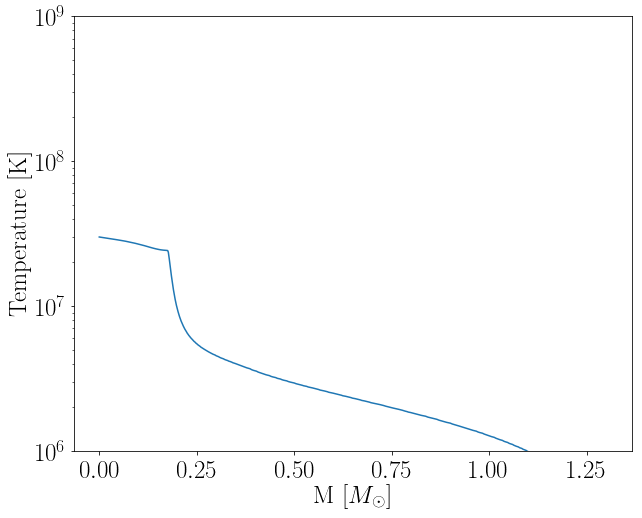

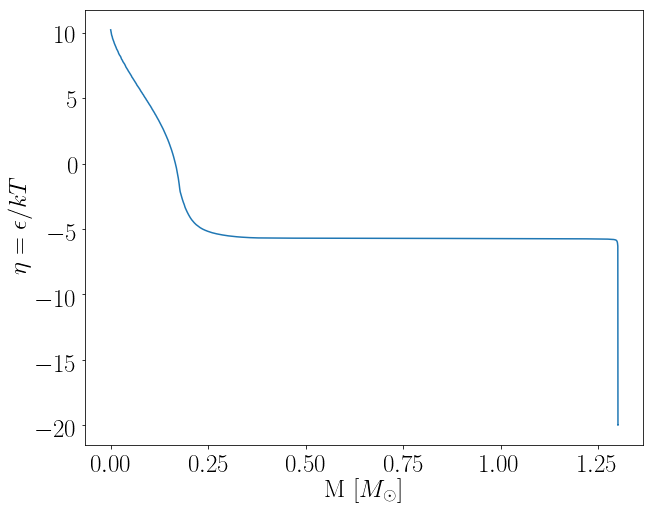

In [27]:
idx_plot = idx_inject_model

plt.figure(1,figsize=(10,8))
plt.plot(M_arr[idx_plot],rho_arr[idx_plot])
plt.yscale('log')
plt.xlabel('M [$M_\\odot$]')
plt.ylabel('Density [g/cm$^3$]')

plt.figure(2,figsize=(10,8))
plt.plot(M_arr[idx_plot],T_arr[idx_plot])
plt.ylim(1e6,1e9)
plt.yscale('log')
plt.xlabel('M [$M_\\odot$]')
plt.ylabel('Temperature [K]')

plt.figure(3,figsize=(10,8))
plt.plot(M_arr[idx_plot],eta_arr[idx_plot])
plt.xlabel('M [$M_\\odot$]')
plt.ylabel('$\eta = \epsilon/kT$')

Arbitrarily decide to inject the energy where eta == 5 in this model

In [39]:
idx_inject_space = np.where(eta_arr[idx_inject_model] > 5)[0][0]
base_of_inject_extra_ergs_sec = M_arr[idx_inject_model][idx_inject_space]
print 'base_of_inject_extra_ergs_sec =',base_of_inject_extra_ergs_sec,'Msun'

base_of_inject_extra_ergs_sec = 0.08822939877659808 Msun


Text(0,0.5,'$\\eta = \\epsilon/kT$')

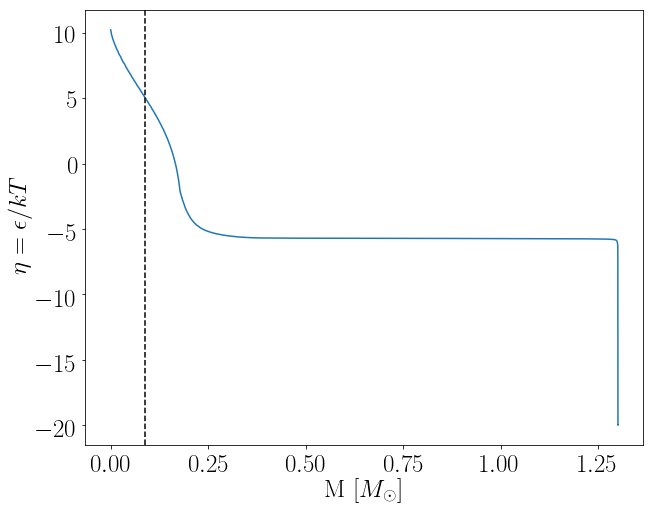

In [38]:
plt.figure(figsize=(10,8))
plt.plot(M_arr[idx_plot],eta_arr[idx_plot])
plt.axvline(base_of_inject_extra_ergs_sec,color='black',linestyle='--')
plt.xlabel('M [$M_\\odot$]')
plt.ylabel('$\eta = \epsilon/kT$')

In [65]:
# Trigger length and Tcrit we estimate from Table 8 at 4e7 K and 2e4 g/cm^3
trigger_length = 4.054E6 # cm
Tcrit = 2.715E8

# Obtain other relevant parameters at this location
T_inj = T_arr[idx_inject_model][idx_inject_space]
rho_inj = rho_arr[idx_inject_model][idx_inject_space]
R_inj = R_arr[idx_inject_model][idx_inject_space]
dR_inj = dR_arr[idx_inject_model][idx_inject_space]
print T_inj/1e7, rho_inj/1e4, R_inj, dR_inj*Rsol2cm
# This region is 2e7 K, 2e4 g/cm^3, at radius 0.015 solar, and the slice is 6e6 cm (similar but longer to trigger)

2.7212307756921583 2.0777671210412967 0.015259627946374473 5825878.2061651945


In [66]:
# The volume in cm^3
volume_inj = 4*np.pi*(R_inj*Rsol2cm)**2*trigger_length
# We then calculate that we heat up this much mass
total_mass_for_inject_extra_ergs_sec = rho_inj*volume_inj*g2Msol
print 'total_mass_for_inject_extra_ergs_sec =',total_mass_for_inject_extra_ergs_sec,'Msun'

total_mass_for_inject_extra_ergs_sec = 0.0006000540339791804 Msun


Text(0,0.5,'$\\eta = \\epsilon/kT$')

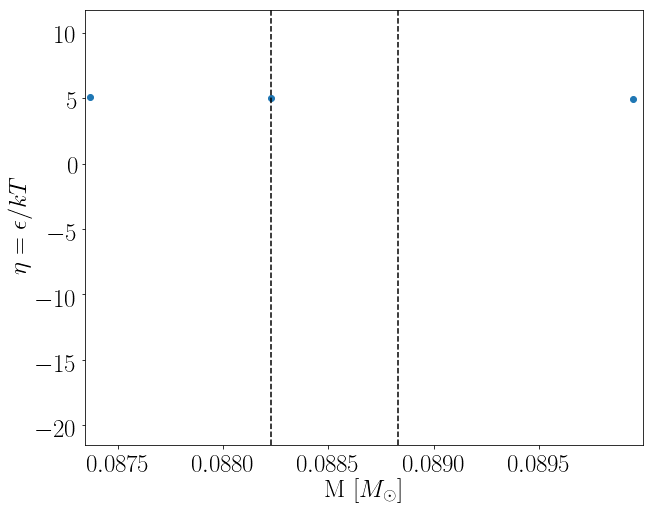

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(M_arr[idx_plot],eta_arr[idx_plot])
plt.axvline(base_of_inject_extra_ergs_sec,color='black',linestyle='--')
plt.axvline(base_of_inject_extra_ergs_sec+total_mass_for_inject_extra_ergs_sec,color='black',linestyle='--')
plt.xlim(0.99*base_of_inject_extra_ergs_sec,1.02*base_of_inject_extra_ergs_sec)
plt.xlabel('M [$M_\\odot$]')
plt.ylabel('$\eta = \epsilon/kT$')

In [55]:
# Arbitrarily, decide that
duration_for_inject_extra_ergs_sec = 1
print 'duration_for_inject_extra_ergs_sec = ',duration_for_inject_extra_ergs_sec,'s'

duration_for_inject_extra_ergs_sec =  1 s


Now we need to estimate the ergs we have to inject to increase the temperature to Tcrit.

In [73]:
# First order thing is put in enough energy for all particles to have energy 3/2*k*Tcrit
N_nucleons = total_mass_for_inject_extra_ergs_sec/g2Msol*g2GeV
N_He = N_nucleons/4
N_e = N_nucleons/2
N_particles = N_He + N_e
required_thermal_energy_to_fuse_He = 3./2*k_in_erg_K*Tcrit
inject_extra_ergs_sec = required_thermal_energy_to_fuse_He*N_particles
print 'inject_extra_ergs_sec =',inject_extra_ergs_sec/duration_for_inject_extra_ergs_sec,'ergs/s'

inject_extra_ergs_sec = 2.82293755150473e+46 ergs/s


# Summary

In [87]:
print 'start_time_for_inject_extra_ergs_sec = {:.2E}'.format(start_time_for_inject_extra_ergs_sec)#+'s'
print 'base_of_inject_extra_ergs_sec = {:.2E}'.format(base_of_inject_extra_ergs_sec)#+'Msun'
print 'total_mass_for_inject_extra_ergs_sec = {:.2E}'.format(total_mass_for_inject_extra_ergs_sec)#+'Msun'
print 'duration_for_inject_extra_ergs_sec = {:.2E}'.format(duration_for_inject_extra_ergs_sec)#+'s'
print 'inject_extra_ergs_sec = {:.2E}'.format(inject_extra_ergs_sec/duration_for_inject_extra_ergs_sec)#+'ergs/s'

start_time_for_inject_extra_ergs_sec = 1.39E+17
base_of_inject_extra_ergs_sec = 8.82E-02
total_mass_for_inject_extra_ergs_sec = 6.00E-04
duration_for_inject_extra_ergs_sec = 1.00E+00
inject_extra_ergs_sec = 2.82E+46
